In [1]:
#script for finding the distribution of which DAU / DET the triggers fall into

In [1]:
import os
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

print(os.getcwd())
%run /Users/andreas/phys/master/GRB/src/harvest_matlab_data.ipynb
%run /Users/andreas/phys/master/GRB/src/read_matlab_file.ipynb
%run /Users/andreas/phys/master/GRB/src/ASIMXspec.ipynb
%matplotlib inline

/Users/andreas/phys/master/GRB/src


/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None



All MAC paths are set!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!

All MAC paths are set!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!


/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for

convert_erg.ipynb loaded successfully!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!


/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None
/Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py:128: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rcParams['lines.marker'] = None


convert_erg.ipynb loaded successfully!
safety_time.ipynb loaded successfully!
LC_calibration loaded successfully!


/Users/andreas/miniforge3/lib/python3.9/site-packages/stingray/utils.py:25: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy fft")


# HEAT MAP

In [39]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

# distribution

In [140]:
def get_dist(tus=None,adr=None,keV=None):
    total_energy_deposited = {'adr 1':0,'adr 2':0,'adr 3':0,'adr 4':0,'adr 5':0,'adr 6':0,'adr 7':0,'adr 8':0,'adr 9':0,'adr 10':0,'adr 11':0,'adr 12':0}
    #i_start,i_end = (find_nearest(tus,time_interval[0]),find_nearest(tus,time_interval[1])+1)
    for i in np.arange(0,len(tus)):
        total_energy_deposited[f'adr {adr[i]}'] += np.round(keV[i],3)
    return total_energy_deposited

def get_counts(df=None,t_start=None,t_end=None):
    df.sort_values(by='tus',inplace=True)
    tus = df['tus'].to_numpy()
    keV = df['keV'].to_numpy()
    adr= df['adr'].to_numpy()
    dau= df['dau'].to_numpy(),
    det = df['det'].to_numpy()

    i,j = find_nearest(tus,t_start),find_nearest(tus,t_end)
    dist = get_dist(tus=tus[i:j],adr=adr[i:j],keV=keV[i:j])
    return np.fromiter(dist.values(),float).reshape(4,3)/1e3


def plot_dist(integraded_counts=None,t_start=None,t_end=None):
    dau_labels, det_labels = ['dau 1','dau 2','dau 3', 'dau 4'], ['det 1','det 2','det 3']
    fig, ax = plt.subplots()
    im, cbar = heatmap(integraded_counts, row_labels=dau_labels, col_labels=det_labels,# ax=ax,
                       cmap="hot", cbarlabel=f"MeV   Exposure {np.round(t_end,3)-np.round(t_start,3)} s")
    #each tile should show have the total amount of keV which is absorbed in the detector given a specific time or bin
    for i in range(len(dau_labels)):
        for j in range(len(det_labels)):
            text = ax.text(j, i, np.round(integraded_counts[i, j],2),
                           ha="center", va="center", color="black")
    plt.show()

In [136]:
def static_main(fn=None,T0=None,t_obs_start=None,t_obs_end=None,t_start=None,t_end=None,tlagg=None):
    '''
    inputs:
    --------
    fn<str>: must be in path
    T0<str>: datetime as string. must be iso format
    
    return <None> plt.show() executed
    '''
    
    T0 = datetime.fromisoformat(T0) + timedelta(seconds=tlagg)
    df = harvest_data(fn=fn,T0=datetime.isoformat(T0))
    df.sort_values(by='tus',inplace=True,ignore_index=True)
    i_df_start,i_df_end = find_nearest(df['tus'].to_numpy(),t_obs_start),find_nearest(df['tus'].to_numpy(),t_obs_end)
    df = df.truncate(before=i_df_start,after=i_df_end)
    
    #converting energy channel to keV
    df.sort_values(by=['adr','tus'],inplace=True) #sorting because we need the keV and adr list
    keV,cal_abc = convert_erg(df['erg'].to_numpy(),df['dau'].to_numpy(),df['det'].to_numpy(),T0)
    print(min(keV),' keV' ,round(max(keV)/1e3,2),' MeV ')
    df['keV'] = keV
    print('Total lengths ', len(df['dau'].to_numpy()),len(df['det'].to_numpy()),len(df['tus'].to_numpy()))
    
    
    df.sort_values(by='tus',inplace=True,ignore_index=True)
    df['tus'] = df['tus'].to_numpy() + tlagg
    tus = df['tus'].to_numpy()

    l,k=find_nearest(tus,t_start),find_nearest(tus,t_end)
    print('counts on interval: ', len(tus[l:k]))
    integraded_counts = get_counts(df,t_start,t_end)
    plot_dist(integraded_counts,t_start,t_end)
    plot_HED(tus_arr=tus[l:]*1e6,binsize=16,T0=T0)
    plt.show()

dau/det starting from index 1
tus array given in seconds
df sorted by tus
49.5092  keV 44.17  MeV 
Total lengths  13474 13474 13474
counts on interval:  1909


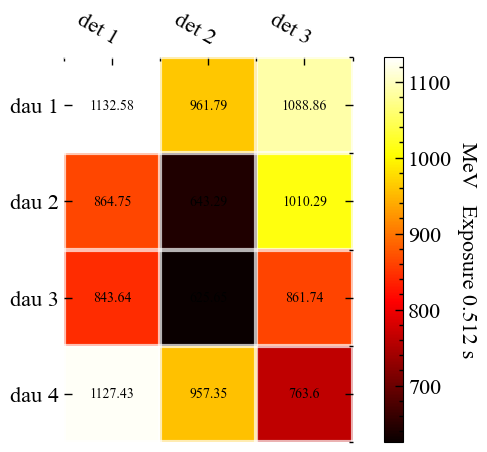

tus array OK ...


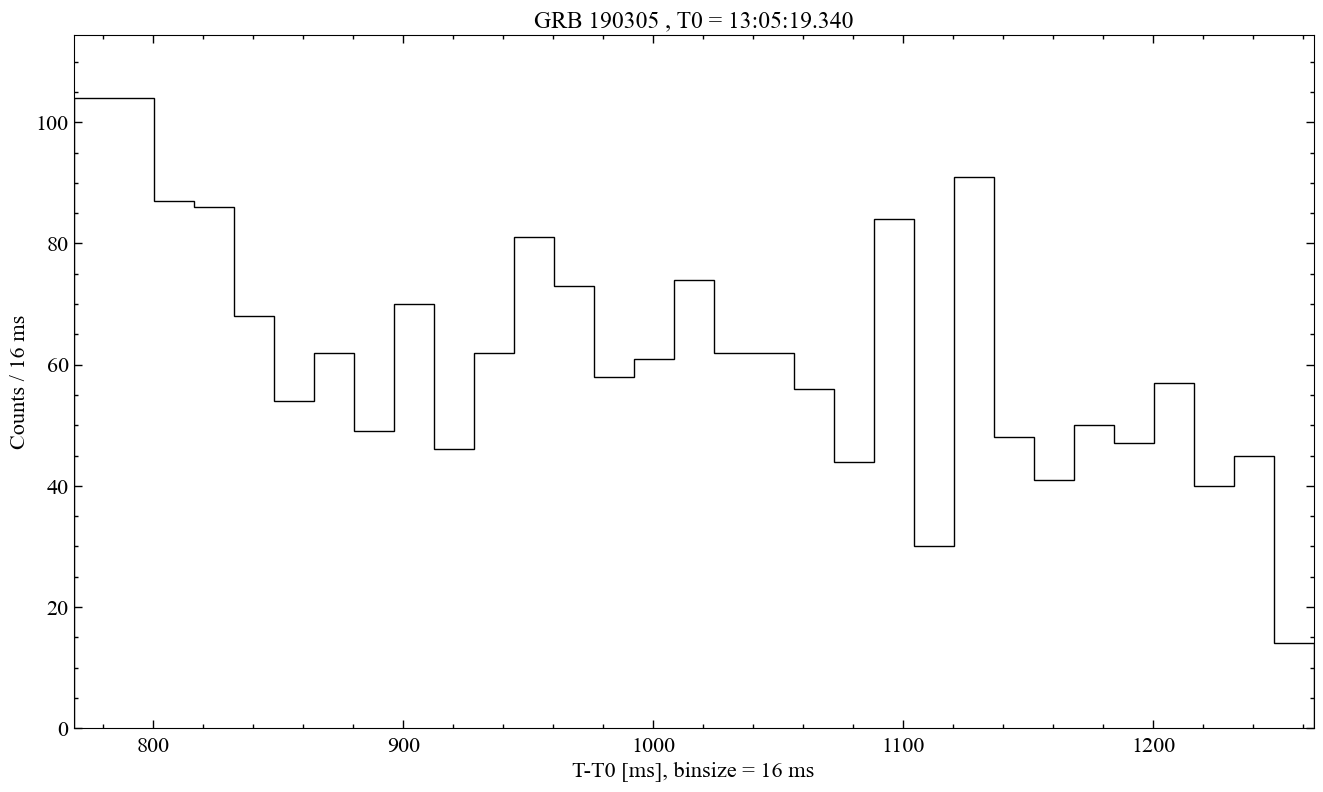

In [141]:
df = static_main(fn='2019_3_5_13_3_48',T0='2019-03-05T13:05:19.816',t_obs_start=-2,t_obs_end=2,t_start=0.768, t_end=1.28,tlagg=-0.476)

# TODO:
    fix the interval for GRB190206. very little data on the back tail

dau/det starting from index 1
tus array given in seconds
df sorted by tus
231.73613600000002  keV 44.06  MeV 
Total lengths  24400 24400 24400
counts on interval:  653


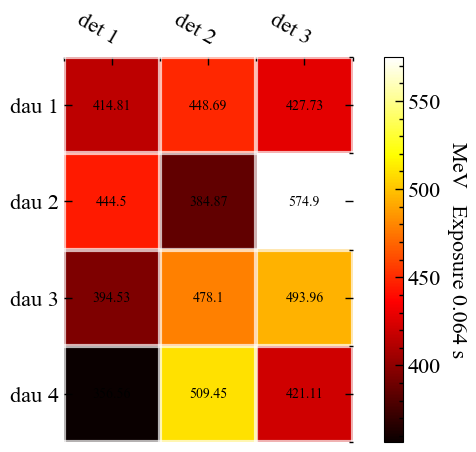

tus array OK ...


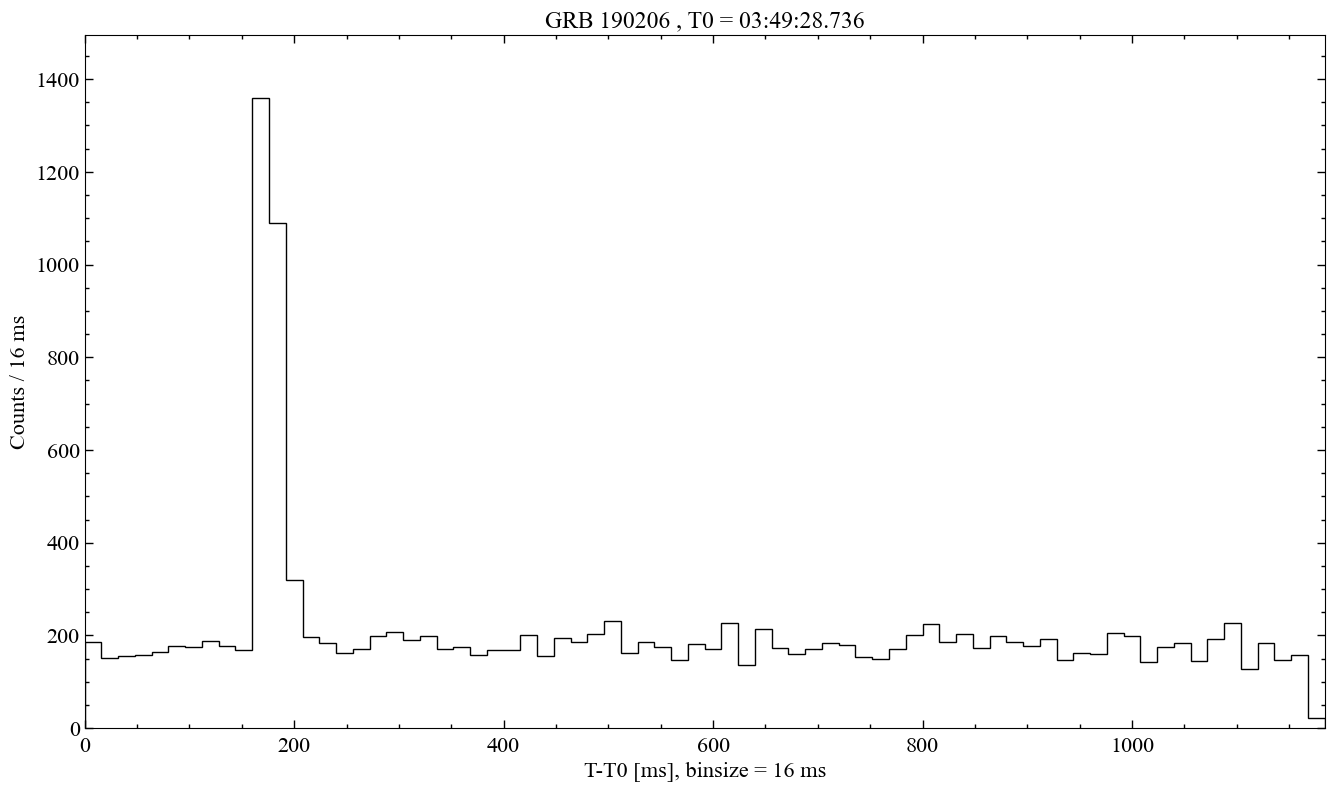

In [144]:
df = static_main(fn='2019_2_6_3_49_28',T0='2019-02-06T03:49:28.443',t_obs_start=-2,t_obs_end=2,t_start=0.00,t_end=0.064,tlagg=0.293)

## dynamic dist plot
    pass in the tus array to get the distribution for the give i,j index range
    for each ~20ms use the function get_counts for time rannge

dt = 0.032 #typically ms
bins_animation = np.arange(tus[0],tus[-1]+dt,dt)
bin_lo = bins_animation[:-1]
bin_hi = bins_animation[1:]

tus = df['tus'].to_numpy()
i = find_nearest(tus,-2)
tus = tus[i:]

keV = df['keV'].to_numpy()[i:]
adr = df['adr'].to_numpy()[i:]
dau = df['dau'].to_numpy()[i:]
det = df['det'].to_numpy()[i:]

counts_in_bin = []
for i in np.arange(0,len(bin_lo)):
    start,end =find_nearest(tus,bin_lo[i]),find_nearest(tus,bin_hi[i])
    dist = get_dist(tus=tus[start:end],adr=adr[start:end],keV=keV[start:end])
    counts = np.fromiter(dist.values(),float).reshape(4,3)/1e3
    print('Max MeV', np.max(counts))
    counts_in_bin.append(counts)

In [ ]:
#run some kind of categoring algorithm on the generated dataset

In [214]:
#run a machine learning algorithm for detecting a burst
#how is the dynamic for the distribution between the GRB's?
#is there a pattern?


#get statistics of which detector triggered the most, which detector absorbed the most energy -and the least

In [100]:
#for c in counts_in_bin:
#plot_dist(c)

## Animation
    Showing how the energy in distributed over the 4 detector units

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
        
    **retrived from https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts